<IPython.core.display.Javascript object>


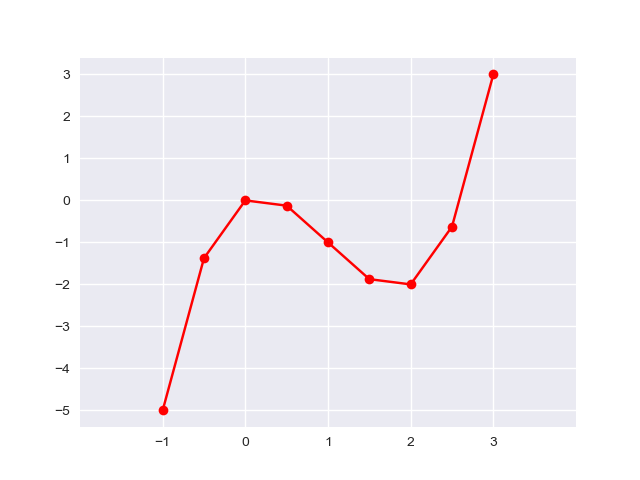

In [6]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 9)
y = f(x)

plt.plot(x, y, 'ro-')
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.show()